In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.analysis_helpers import side_by_side_bar_plot, get_value_counts, distribution_plots
from scipy.stats import mannwhitneyu, kstest

In [2]:
# Read in reviews data csv file
df = pd.read_csv("../data/movieReplicationSet.csv")

In [3]:
def bar_plot(x_values, y_values, title, xlabel, ylabel):
    # Create new dataframe with gender counts - will make it easier to plot
    df_bars = pd.DataFrame({
        "x": x_values,
        "y": y_values
    })

    ax = df_bars.plot(kind="bar", x="x", y="y", legend=False)  # Bar plot
    ax.bar_label(ax.containers[0])  # Add value labels on top of each bar
    plt.xticks(rotation=0)  # Keep x tick labels horizontal
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Question 3

Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently? 

### Plot Genders

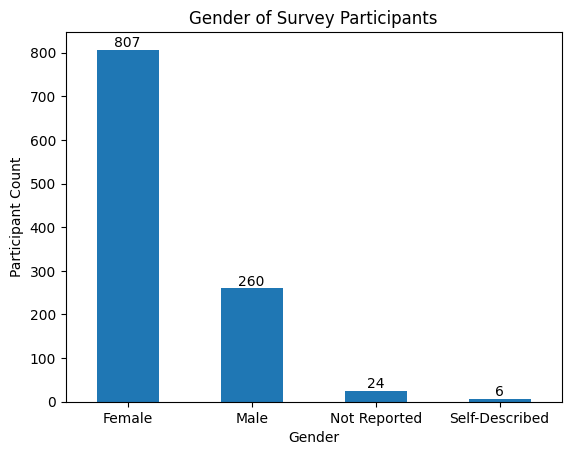

In [4]:
# Plot counts of participant genders
gender_col_name = df.columns[474]  # Get gender column in dataframe
x_values = ["Female", "Male", "Not Reported", "Self-Described"]  # X labels
y_values = df[gender_col_name].value_counts(dropna = False)  # Y values - do not drop na values. Instead these will be plotted as "Not Reported"

bar_plot(
    x_values,
    y_values,
    title="Gender of Survey Participants",
    xlabel="Gender",
    ylabel="Participant Count"
)

### Plot Distribution of Scores by Male and Female

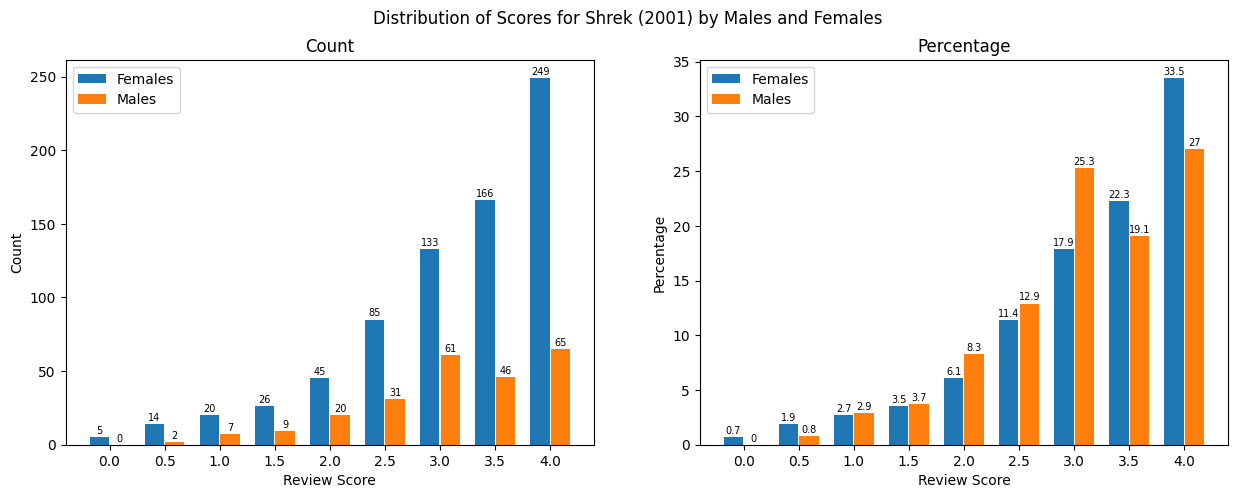

In [5]:
shrek_col_name = "Shrek (2001)"  # Column name for shrek movies
shrek_reviews_female = df[shrek_col_name].loc[df[gender_col_name] == 1]  # Split into male reviews
shrek_reviews_male = df[shrek_col_name].loc[df[gender_col_name] == 2]  # Split into female reviews

# Plot distributions
distribution_plots(
        sample_a=shrek_reviews_female, 
        sample_b=shrek_reviews_male,
        sample_a_label="Females",
        sample_b_label="Males",
        title="Distribution of Scores for Shrek (2001) by Males and Females",
        x_axis_label="Review Score",
        figsize=(15,5),
        gap=0.02
)

### Perform Statistical Test

In [6]:
U1, p = mannwhitneyu(shrek_reviews_female.dropna(), shrek_reviews_male.dropna())
print(p)

0.050536625925559


In [7]:
res = kstest(shrek_reviews_female.dropna(), shrek_reviews_male.dropna())
print(res)

KstestResult(statistic=np.float64(0.09796552051512596), pvalue=np.float64(0.05608204072286342), statistic_location=np.float64(3.0), statistic_sign=np.int8(-1))


# Question 5
Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

### Plot Only Child Status

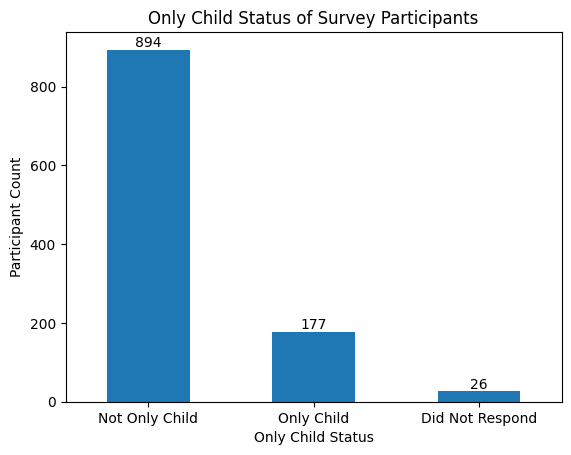

In [8]:
# Plot counts of participant genders
only_child_col_name = df.columns[475]  # Get gender column in dataframe
x_values = ["Not Only Child", "Only Child", "Did Not Respond"]  # X labels
y_values = df[only_child_col_name].value_counts(dropna = False)  # Y values - do not drop na values. Instead these will be plotted as "Not Reported"

bar_plot(
    x_values,
    y_values,
    title="Only Child Status of Survey Participants",
    xlabel="Only Child Status",
    ylabel="Participant Count"
)

### Plot Distribution of Scores by Only Child Status

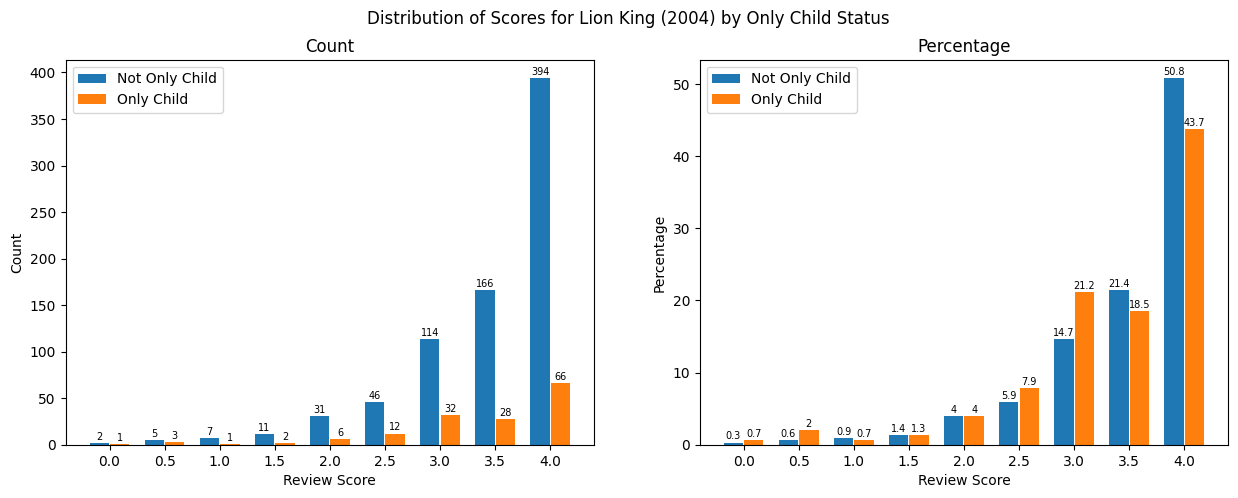

In [9]:
lion_king_col_name = "The Lion King (1994)"  # Column name for shrek movies
lion_king_reviews_not_only_child = df[lion_king_col_name].loc[df[only_child_col_name] == 0]  # Split into not only child reviews
lion_king_reviews_only_child = df[lion_king_col_name].loc[df[only_child_col_name] == 1]  # Split into only child reviews

# Plot distributions
distribution_plots(
        sample_a=lion_king_reviews_not_only_child, 
        sample_b=lion_king_reviews_only_child,
        sample_a_label="Not Only Child",
        sample_b_label="Only Child",
        title="Distribution of Scores for Lion King (2004) by Only Child Status",
        x_axis_label="Review Score",
        figsize=(15, 5),
        gap=0.02
)

### Perform Statistical Test

In [12]:
#two-tailed mann whitney u
U1, p = mannwhitneyu(lion_king_reviews_only_child.dropna(), lion_king_reviews_not_only_child.dropna())
print(p)

0.04319872995682849


In [15]:
#one-tailed mann whitney u - 
U1, p = mannwhitneyu(lion_king_reviews_only_child.dropna(), lion_king_reviews_not_only_child.dropna(), alternative="greater")
print(p)

0.978419092554931


In [16]:
#one-tailed mann whitney u - 
U1, p = mannwhitneyu(lion_king_reviews_only_child.dropna(), lion_king_reviews_not_only_child.dropna(), alternative="less")
print(p)

0.021599364978414245
